In [1]:
import pandas as pd

df = pd.read_csv('../data/sierraleone-bumbuna.csv')  
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [7]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [8]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [9]:
df.select_dtypes(include='object').nunique()

Timestamp    525600
dtype: int64

In [10]:
df.select_dtypes(include='number').nunique().sort_values(ascending=False)

ModA             10188
GHI               8742
ModB              8524
DNI               8205
DHI               7183
WD                3601
RH                 902
WDstdev            712
TModA              620
TModB              572
Tamb               276
WS                 145
WSgust              88
WSstdev             40
Precipitation       24
BP                  14
Cleaning             2
Comments             0
dtype: int64

In [11]:
df.isna().sum().sort_values(ascending=False)

Comments         525600
WSstdev               0
TModB                 0
TModA                 0
Precipitation         0
Cleaning              0
BP                    0
WDstdev               0
WD                    0
Timestamp             0
GHI                   0
WS                    0
RH                    0
Tamb                  0
ModB                  0
ModA                  0
DHI                   0
DNI                   0
WSgust                0
dtype: int64

In [12]:
threshold = 0.05 * len(df)
missing_cols = df.columns[df.isna().sum() > threshold]
missing_cols

Index(['Comments'], dtype='object')

In [13]:
df = df.drop(columns=['Comments'])  

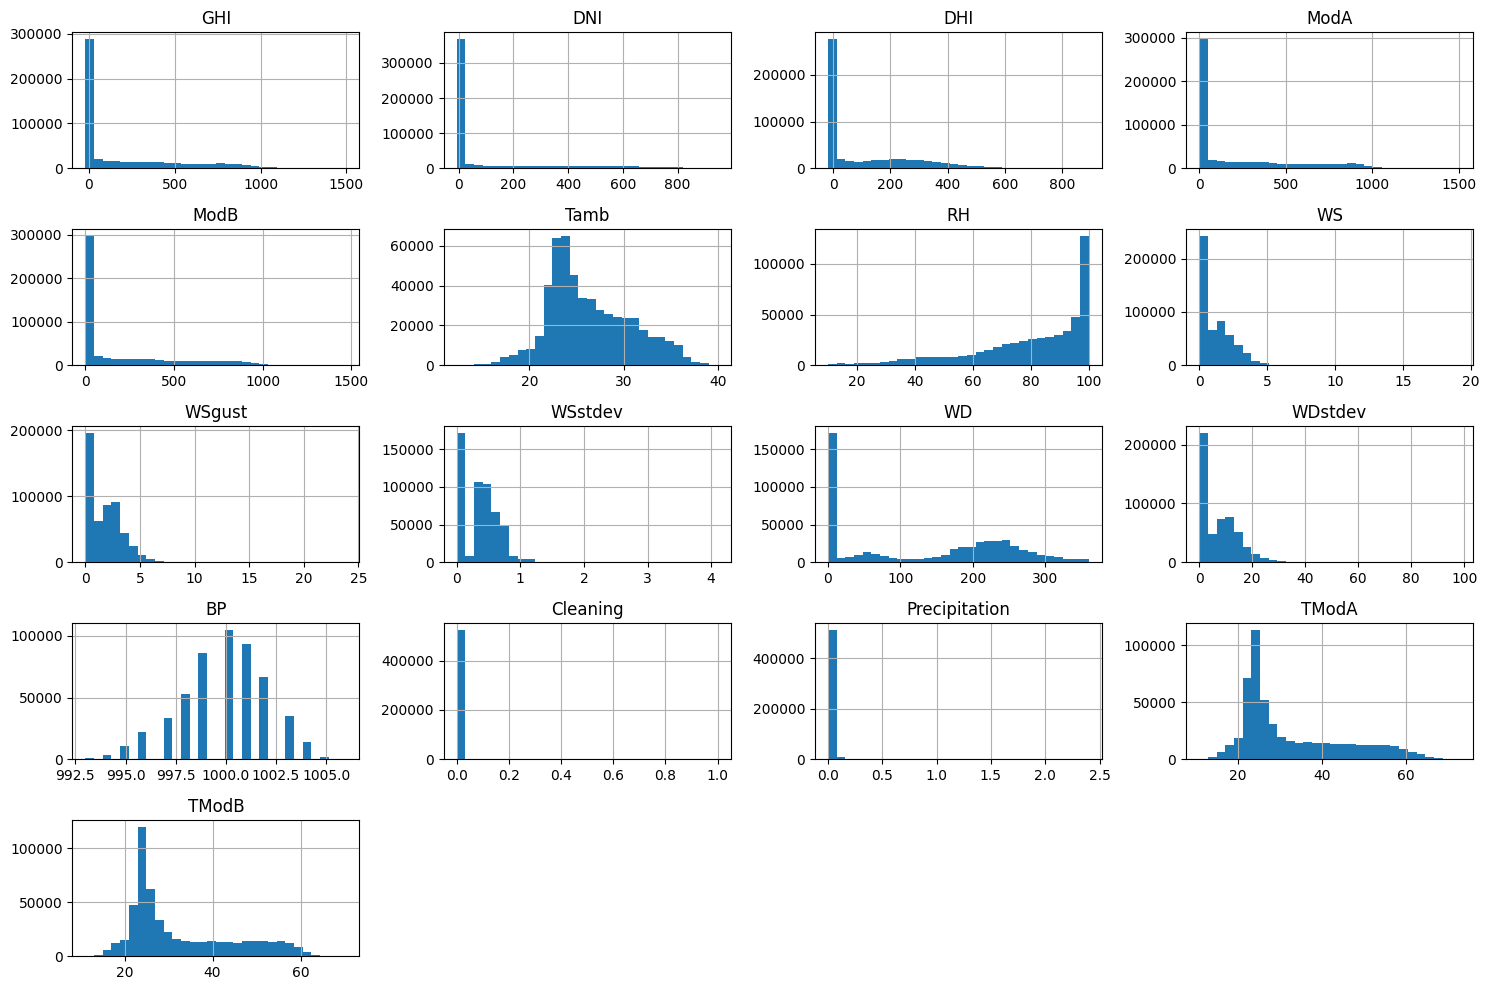

In [14]:
import matplotlib.pyplot as plt

df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [15]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':\n")
    print(df[col].value_counts())


Value counts for 'Timestamp':

Timestamp
2021-10-30 00:01    1
2022-06-30 06:36    1
2022-06-30 08:10    1
2022-06-30 08:09    1
2022-06-30 08:08    1
                   ..
2022-02-28 15:55    1
2022-02-28 15:54    1
2022-02-28 15:53    1
2022-02-28 15:52    1
2022-10-30 00:00    1
Name: count, Length: 525600, dtype: int64


In [3]:
# Columns for which to detect outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-score manually and filter out rows where abs(Z) > 3
df_cleaned = df.copy()

for col in cols:
    mean = df_cleaned[col].mean()
    std = df_cleaned[col].std()
    df_cleaned = df_cleaned[df_cleaned[col].apply(lambda x: abs((x - mean) / std) <= 3)]

# Drop rows with missing values in key columns
df_cleaned = df_cleaned.dropna(subset=cols)

# Save cleaned version
df_cleaned.to_csv('../data/sierraleone_clean.csv', index=False)
